By  
Dasari Jayanth  
2019BCS-016  

# Importing Dataset

In [1]:
import tensorflow as tf
from os import path, getcwd, chdir
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import sys

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

# Loading Dataset

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
X = train_images
X.shape

(60000, 28, 28)

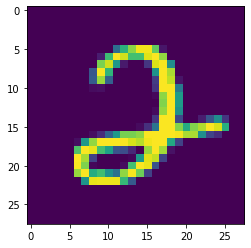

In [4]:
X_=X.reshape(-1,28,28,1)
plt.imshow(X_[16,:,:,0])

In [5]:
n_train, nx, ny = train_images.shape
train_images.shape

(60000, 28, 28)

In [6]:
n_test, nx_t, ny_t = test_images.shape
test_images.shape

(10000, 28, 28)

In [7]:
# Preprocessing and Normalizing the data

# # Training Data
train_images = train_images.reshape((n_train, nx*ny))  # 3-D ==> 2-D

# # Test Data
test_images  = test_images.reshape((n_test, nx_t*ny_t))

In [8]:
#Normalize features:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_data_N = scaler.fit_transform(train_images)
print(train_data_N.shape)

test_data_N = scaler.fit_transform(test_images)
print(f"shape of test_data_N ==> {test_data_N.shape}")

(60000, 784)
shape of test_data_N ==> (10000, 784)


In [9]:
N_COMP = 9 #The number of components for PCA
SAMPLE_INDEX = 16 #The index of the image to show

In [10]:
#Apply PCA:
pca = PCA(n_components=N_COMP)
X_norm_r = pca.fit(train_data_N).transform(train_data_N)
X_norm_t = pca.transform(test_data_N)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

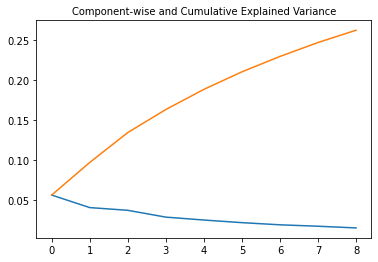

In [11]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(N_COMP), pca.explained_variance_ratio_)
plt.plot(range(N_COMP), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [12]:
#Invert the PCA to obtain the image with the new components:
inv = pca.inverse_transform(X_norm_r[SAMPLE_INDEX, :])
inv = scaler.inverse_transform(inv.reshape(1,-1)) #Unnormalize

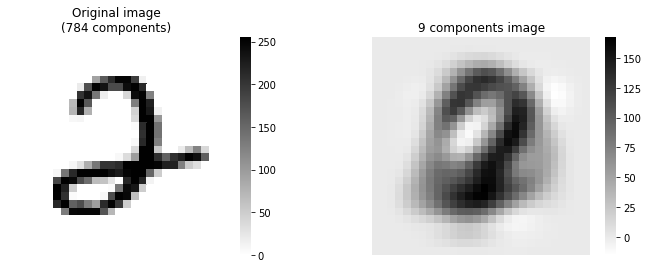

In [13]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[SAMPLE_INDEX, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("9 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

2nd way of implementation, without library

In [14]:
# X_norm = train_data_N.T #Transpose the design matrix to match the formulas

# S = X_norm @ X_norm.T #Covariance matrix
# eigvals, eigvecs = np.linalg.eig(S) # compute eigenvalues and eigenvectors
# order = np.argsort(eigvals) #sort eigenvalues in ascending order (add [::-1] to get descenging order)
# B = eigvecs[:, order[:N_COMP]] #Take the last N_COMP eigenvectors as new basis

# C = B.T @ X_norm #Code: projection of X in the subspace spanned by the columns of B

# X_rec = B @ C #revert the tranformation to project the code back in the original space

# X_rec = X_rec.T #Bring back the dimensions to the original convention
# X_rec = scaler.inverse_transform(X_rec) #Unnormalize

In [15]:
# #Plot images:
# fig, axarr = plt.subplots(1, 3, figsize=(12, 4))
# sns.heatmap(X[SAMPLE_INDEX, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
# sns.heatmap(inv.reshape(28, 28), cmap='gray_r', ax=axarr[1])
# sns.heatmap(X_rec[SAMPLE_INDEX, :].reshape(28, 28), cmap='gray_r', ax=axarr[2])
# axarr[0].set_title("Original image\n({} components)".format(X.shape[1]), fontsize=12)
# axarr[1].set_title("First {} components image".format(N_COMP), fontsize=12)
# axarr[2].set_title("Best {} components image".format(N_COMP), fontsize=12)
# axarr[0].set_aspect('equal')
# axarr[1].set_aspect('equal')
# axarr[2].set_aspect('equal')
# axarr[0].axis('off')
# axarr[1].axis('off')
# axarr[2].axis('off')

# plt.show()

In [16]:
# X_t_norm = test_data_N.T #Transpose the design matrix to match the formulas

# S_t = X_t_norm @ X_t_norm.T #Covariance matrix
# eigvals_t, eigvecs_t = np.linalg.eig(S_t) # compute eigenvalues and eigenvectors
# order_t = np.argsort(eigvals_t) #sort eigenvalues in ascending order (add [::-1] to get descenging order)
# B = eigvecs_t[:, order_t[:N_COMP]] #Take the last N_COMP eigenvectors as new basis

# C = B.T @ X_t_norm #Code: projection of X in the subspace spanned by the columns of B

# X_rec_t = B @ C #revert the tranformation to project the code back in the original space

# X_rec_t = X_rec_t.T #Bring back the dimensions to the original convention
# X_rec_t = scaler.inverse_transform(X_rec_t) #Unnormalize

# K-NN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 5
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_norm_r, train_labels)
yhat = kNN_model.predict(X_norm_t)
metrics.accuracy_score(test_labels, yhat)

0.8895

In [20]:
k_5 = metrics.accuracy_score(test_labels, yhat)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 3
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_norm_r, train_labels)
yhat = kNN_model.predict(X_norm_t)
metrics.accuracy_score(test_labels, yhat)

0.8814

In [22]:
k_3 = metrics.accuracy_score(test_labels, yhat)

# LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [24]:
lda = LDA(n_components=9)
lda_train = lda.fit_transform(train_data_N, train_labels)
lda_test = lda.transform(test_data_N)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 5
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(lda_train, train_labels)
yhat = kNN_model.predict(lda_test)
metrics.accuracy_score(test_labels, yhat)

0.9141

In [26]:
k_5_lda = metrics.accuracy_score(test_labels, yhat)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 3
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(lda_train, train_labels)
yhat = kNN_model.predict(lda_test)
metrics.accuracy_score(test_labels, yhat)

0.9094

In [28]:
k_3_lda = metrics.accuracy_score(test_labels, yhat)

# Auto Encoder

[refer here](https://machinelearningmastery.com/autoencoder-for-regression/)

In [29]:
from tensorflow.keras import layers, losses
from keras.layers import Input, Dense
from keras.models import Model

In [30]:
def plot_train_history_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [31]:
def display_reconstructed(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            # display reconstruction
            ax = plt.subplot(2, n, i + 1 + n)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

In [35]:
input_img = Input(shape=(784,))
encoded = Dense(500, activation='relu')(input_img)
encoded = Dense(224, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(9, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(224, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

Epoch 1/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7830 - accuracy: 0.0097 - val_loss: 0.6816 - val_accuracy: 0.0086
Epoch 2/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7349 - accuracy: 0.0155 - val_loss: 0.6689 - val_accuracy: 0.0220
Epoch 3/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7269 - accuracy: 0.0202 - val_loss: 0.6647 - val_accuracy: 0.0199
Epoch 4/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7223 - accuracy: 0.0220 - val_loss: 0.6599 - val_accuracy: 0.0230
Epoch 5/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7179 - accuracy: 0.0246 - val_loss: 0.6566 - val_accuracy: 0.0348
Epoch 6/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7124 - accuracy: 0.0282 - val_loss: 0.6497 - val_accuracy: 0.0275
Epoch 7/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7080 - accuracy: 0.0282 - val_loss: 0.6471 -

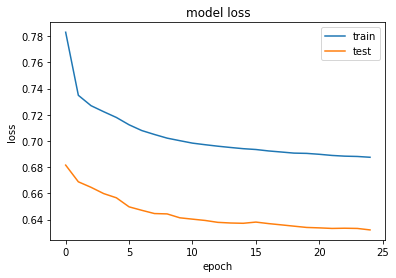

In [37]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])
history = autoencoder.fit(train_data_N, train_data_N,
                epochs=25,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history)

In [38]:
encoded_train = autoencoder.predict(train_data_N)
encoded_test  = autoencoder.predict(test_data_N)

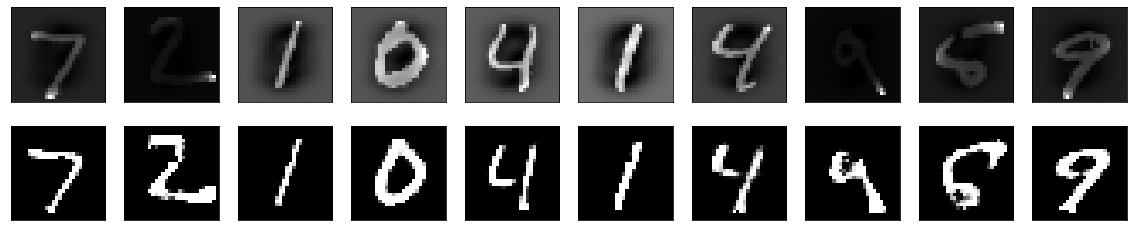

In [39]:
display_reconstructed(test_data_N, encoded_test, 10)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 3
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(encoded_train, train_labels)
yhat = kNN_model.predict(encoded_test)
metrics.accuracy_score(test_labels, yhat)

0.924

In [41]:
k_3_ae = metrics.accuracy_score(test_labels, yhat)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 5
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(encoded_train, train_labels)
yhat = kNN_model.predict(encoded_test)
metrics.accuracy_score(test_labels, yhat)

0.9305

In [53]:
k_5_ae = metrics.accuracy_score(test_labels, yhat)

# Comparing Test Accuracies

In [46]:
import pandas as pd

In [55]:
data = {'Techniques':['PCA', 'LDA', 'AutoEncoder'],
        'Accuracy (k =3) in %':[k_3*100 ,k_3_lda*100 , k_3_ae*100],
        'Accuracy (k =5) in %':[k_5*100 ,k_5_lda*100 , k_5_ae*100]}
df = pd.DataFrame(data)

In [56]:
print(df)

    Techniques  Accuracy (k =3) in %  Accuracy (k =5) in %
0          PCA                 88.14                 88.95
1          LDA                 90.94                 91.41
2  AutoEncoder                 92.40                 93.05
